In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from acalib import *
from acalib.io.graph import *

## Loading Data

In [5]:
binpath = '../../bindata/fits/cubes/'

# Data from ALMA science verification 
orion_path = binpath + 'Orion.methanol.cbc.contsub.image.fits'
container = load_fits(orion_path)
orion     = container.primary


data3D = orion.data.astype(np.float64)
rms3D = np.sqrt((data3D*data3D).sum()/data3D.size)

data2D = data3D.sum(axis=0)
rms2D = np.sqrt((data2D*data2D).sum()/data2D.size)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


## Applying pycupid's clumpfind

In [10]:
res2D = algorithms.clumpfind(data2D, rms=rms2D)

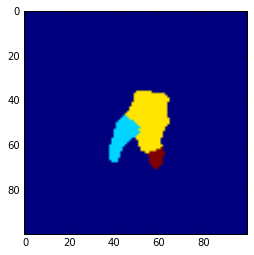

In [11]:
plt.imshow(res2D.data)
plt.show()

In [13]:
res3D = algorithms.clumpfind(orion, rms=estimate_rms(orion))
visualize(res3D)

/home/martin/miniconda2/lib/python2.7/site-packages/traits/has_traits.py:1541: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  setattr( self, name, value )
